In [121]:
"""
@author: faurand, chardes, ehagensieker
"""
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from mlp import MLP
from layer import Layer

In [122]:
#create the multilayer perceptron
mlp = MLP()
mlp.add_layer(Layer(10,1)) # hidden layer with ten units, which receives one input
mlp.add_layer(Layer(1,10)) # output layer with one unit, which receives ten inputs

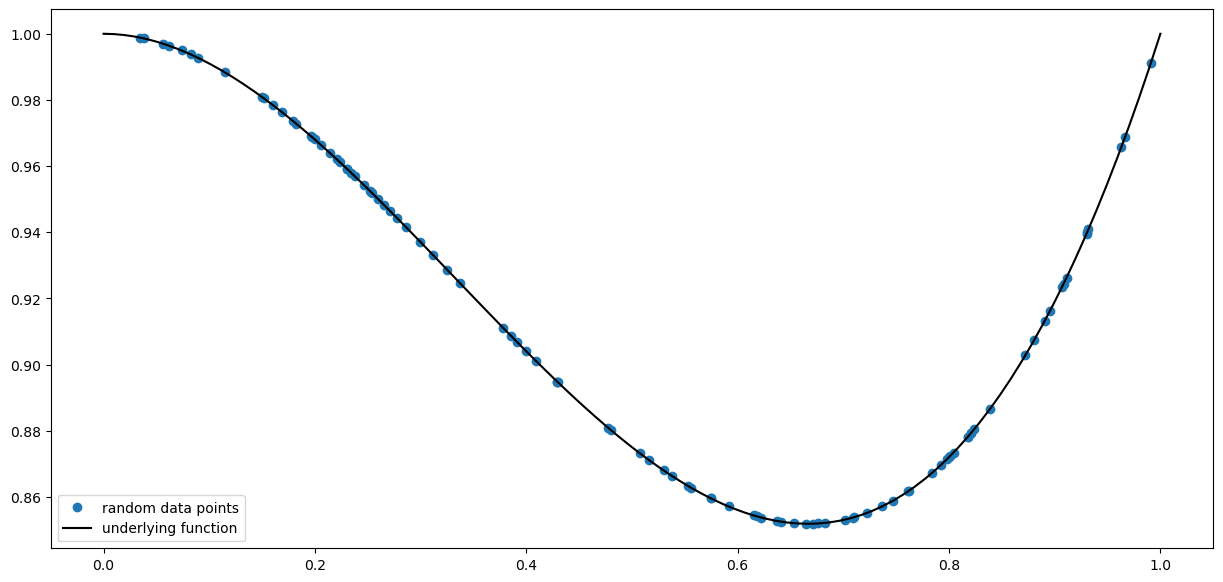

In [123]:
#build the data set
f = lambda x: x**3-x**2+1

x = np.random.rand(100)
t = f(x)

# plot the data points
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x,t,'o',label='random data points')

# plot the underlying function
x2 = np.linspace(0,1,100)
ax.plot(x2,f(x2),'k',label='underlying function')

# display the plot
ax.legend()
plt.show()

In [124]:
loss_average = []

#training the network for 1000 epochs
for epoch in range(1000):
    
    error = []
    
    #in each epoch, loop through all datapoints once
    for i,y in zip(x,t):
        activation = mlp.forward_step(np.array([[i]]))
        mse = 1/2*(activation-y)**2
        mse_prime = activation-y
        mlp.backpropagation(mse_prime,0.01)
        error.append(mse)
        
    loss_average.append(np.mean(error))
    if epoch%15 == 0:
        print(f'epoch: {epoch}, loss: {loss_average[epoch]}')

epoch: 0, loss: 0.13178440869281982
epoch: 15, loss: 0.0028728379063887653
epoch: 30, loss: 0.0007287304421955547
epoch: 45, loss: 0.00033283040325241133
epoch: 60, loss: 0.0002618471570311584
epoch: 75, loss: 0.00023873881496119863
epoch: 90, loss: 0.0002270096242552306
epoch: 105, loss: 0.00021778299281502165
epoch: 120, loss: 0.00020980043666407448
epoch: 135, loss: 0.00020260319908994636
epoch: 150, loss: 0.00019590916578273083
epoch: 165, loss: 0.00018952985993271458
epoch: 180, loss: 0.00018343814146079288
epoch: 195, loss: 0.00017762928602193704
epoch: 210, loss: 0.0001720710583617982
epoch: 225, loss: 0.00016673970240658402
epoch: 240, loss: 0.0001616195025800869
epoch: 255, loss: 0.00015670000818648346
epoch: 270, loss: 0.0001519735832779667
epoch: 285, loss: 0.0001474340095297368
epoch: 300, loss: 0.0001430757629317729
epoch: 315, loss: 0.00013889364672111374
epoch: 330, loss: 0.00013488261028190497
epoch: 345, loss: 0.00013103766433802033
epoch: 360, loss: 0.0001273538454897

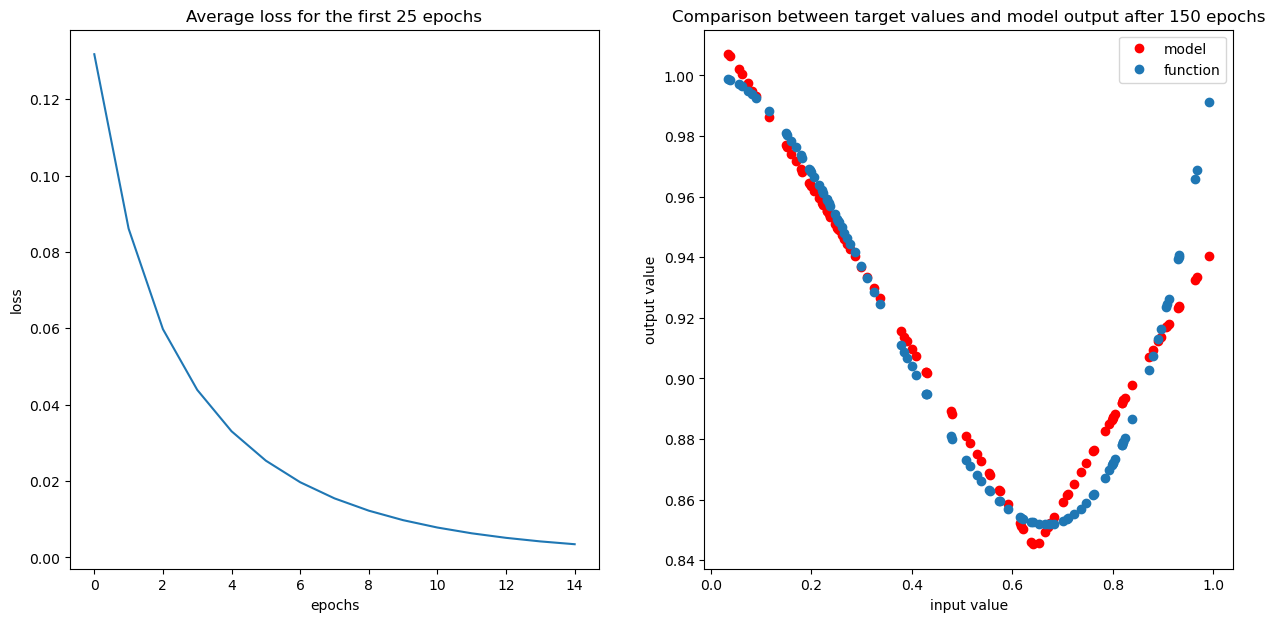

In [125]:
#visualize the training progress
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(loss_average[:15])
ax[0].set(title='Average loss for the first 25 epochs', xlabel='epochs', ylabel='loss')

preds = np.array([mlp.forward_step(np.array([[i]])) for i in x]).flatten()
ax[1].plot(x,preds,'o',label='model', color='red')
#ax[1].plot(x,preds_0,'o',label='untrained model', color='green')
ax[1].plot(x,t,'o',label='function')
ax[1].set(title='Comparison between target values and model output after 150 epochs', xlabel='input value', ylabel='output value')
ax[1].legend()

plt.show;